<a href="https://colab.research.google.com/github/arfaluvess/project_new/blob/master/usml_mall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[269981.28]
[269981.28, 181363.59595959593]
[269981.28, 181363.59595959593, 106348.37306211122]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25012.917069885472]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25012.917069885472, 21932.392044240984]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25012.917069885472, 21932.392044240984, 19646.482018947238]


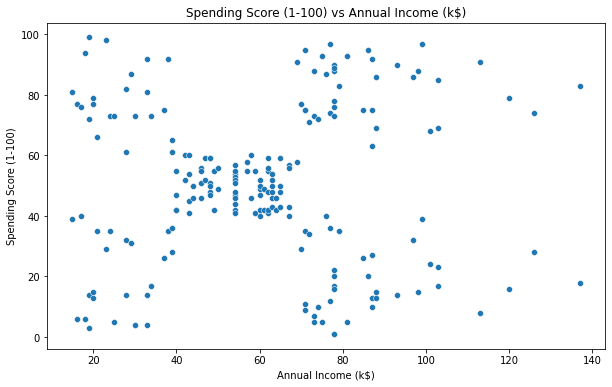

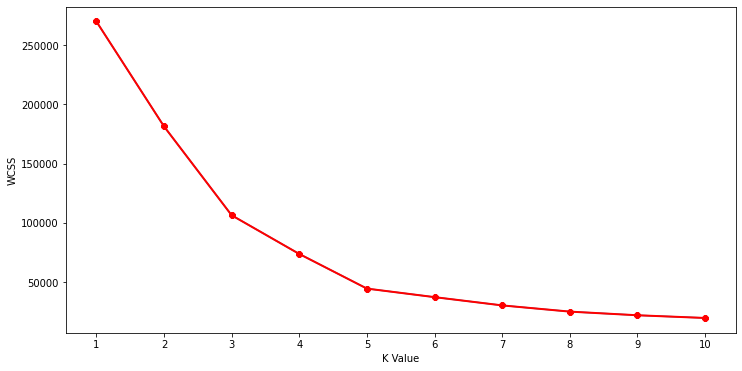

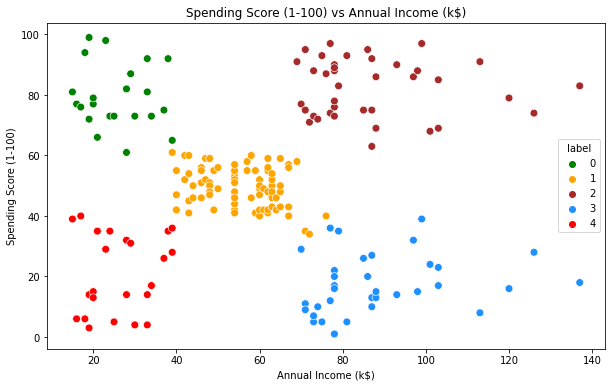

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 

mall_df = pd.read_csv('/content/mall_customer.csv')
mall_df.head()

X = mall_df[['Annual_Income_(k$)','Spending_Score']]

# Scatterplot of the input data
plt.figure(figsize=(10, 6))
sns.scatterplot(X['Annual_Income_(k$)'], X['Spending_Score']);
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')

# Find the KMeans of Mall Customer
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
    print(wcss)

#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
mall_df["label"] = y
#The new dataframe with the clustering done
mall_df.head()

#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual_Income_(k$)',y = 'Spending_Score',hue="label", palette=['green','orange','brown','dodgerblue','red'], legend='full',data = mall_df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()